### Investigate 15710 null assessment_item_response_id

In [2]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


In [6]:
dfFlt = load_df('dfFlt')

dfNull = dfFlt.filter( F.col('assessment_item_response_id').isNull() )

In [11]:
dfIds = dfFlt.withColumn(
                "has_assessment_id",
                  F.when( F.col('assessment_id').isNull(), 'No').otherwise("Yes")
                ).withColumn(
                "has_assessment_instance_attempt_id",
                  F.when( F.col('assessment_instance_attempt_id').isNull(), 'No').otherwise("Yes")
                ).withColumn(
                "has_assessment_instance_id",
                  F.when( F.col('assessment_instance_id').isNull(), 'No').otherwise("Yes")
                ).withColumn(
                "has_assessment_item_response_id",
                  F.when( F.col('assessment_item_response_id').isNull(), 'No').otherwise("Yes")
                ).withColumn(
                "has_learner_assigned_item_attempt_id",
                  F.when( F.col('learner_assigned_item_attempt_id').isNull(), 'No').otherwise("Yes")
                ).withColumn(
                "has_learner_assignment_attempt_id",
                  F.when( F.col('learner_assignment_attempt_id').isNull(), 'No').otherwise("Yes")
                )

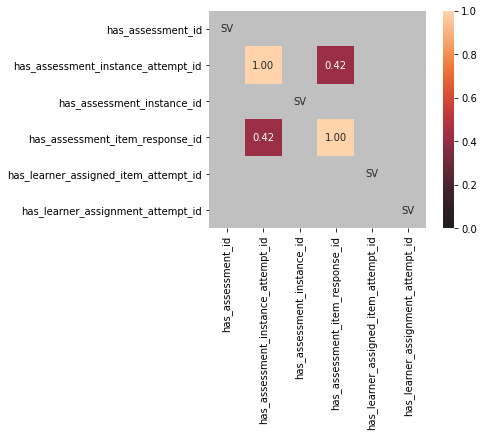

{'corr':                                       has_assessment_id  \
 has_assessment_id                                   0.0   
 has_assessment_instance_attempt_id                  0.0   
 has_assessment_instance_id                          0.0   
 has_assessment_item_response_id                     0.0   
 has_learner_assigned_item_attempt_id                0.0   
 has_learner_assignment_attempt_id                   0.0   
 
                                       has_assessment_instance_attempt_id  \
 has_assessment_id                                               0.000000   
 has_assessment_instance_attempt_id                              1.000000   
 has_assessment_instance_id                                      0.000000   
 has_assessment_item_response_id                                 0.417409   
 has_learner_assigned_item_attempt_id                            0.000000   
 has_learner_assignment_attempt_id                               0.000000   
 
                             

In [12]:
vars = [
    'has_assessment_id',
    'has_assessment_instance_attempt_id',
    'has_assessment_instance_id',
    'has_assessment_item_response_id',
    'has_learner_assigned_item_attempt_id',
    'has_learner_assignment_attempt_id'
]
associations( dfIds.select(*vars).toPandas() )

In [ ]:
add_todo('Investigate 15710 null assessment_item_response_id')
